# Data Preprocessing - ENB2012 Energy Efficiency Dataset

**Objective:** Prepare the ENB2012 dataset for machine learning model training

## Steps:
1. Load the dataset
2. Feature understanding and naming
3. Train-test split
4. Feature scaling/normalization
5. Handle multicollinearity
6. Save preprocessed data

**Dataset Info:**
- 768 building samples
- 8 input features (X1-X8)
- 2 target variables (Y1=Heating Load, Y2=Cooling Load)

## 1. Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


## 2. Load Dataset

In [4]:
# Load the dataset
dataset_path = Path('../datasets/ENB2012_data.xlsx')
df = pd.read_excel(dataset_path)

print(f"📊 Dataset loaded: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\n📋 Columns: {list(df.columns)}")
print(f"\n🔍 First 3 rows:")
display(df.head(3))

📊 Dataset loaded: 768 rows × 10 columns

📋 Columns: ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2']

🔍 First 3 rows:


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33


## 3. Feature Understanding

Based on the Energy Efficiency dataset documentation, the features represent:
- **X1**: Relative Compactness
- **X2**: Surface Area (m²)
- **X3**: Wall Area (m²)
- **X4**: Roof Area (m²)
- **X5**: Overall Height (m)
- **X6**: Orientation (2-5)
- **X7**: Glazing Area (0-0.4)
- **X8**: Glazing Area Distribution (0-5)

**Target Variables:**
- **Y1**: Heating Load (kWh/m²)
- **Y2**: Cooling Load (kWh/m²)

In [5]:
# Rename columns for better understanding
feature_names = {
    'X1': 'Relative_Compactness',
    'X2': 'Surface_Area',
    'X3': 'Wall_Area',
    'X4': 'Roof_Area',
    'X5': 'Overall_Height',
    'X6': 'Orientation',
    'X7': 'Glazing_Area',
    'X8': 'Glazing_Area_Distribution',
    'Y1': 'Heating_Load',
    'Y2': 'Cooling_Load'
}

df_renamed = df.rename(columns=feature_names)
print("✅ Columns renamed for better readability")
print(f"\n📋 New column names:")
for old, new in feature_names.items():
    print(f"   {old} → {new}")

display(df_renamed.head())

✅ Columns renamed for better readability

📋 New column names:
   X1 → Relative_Compactness
   X2 → Surface_Area
   X3 → Wall_Area
   X4 → Roof_Area
   X5 → Overall_Height
   X6 → Orientation
   X7 → Glazing_Area
   X8 → Glazing_Area_Distribution
   Y1 → Heating_Load
   Y2 → Cooling_Load


,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


## 4. Check for Data Quality Issues

In [6]:
print("=" * 70)
print("DATA QUALITY CHECK")
print("=" * 70)

# Missing values
print("\n1️⃣ Missing Values:")
missing = df_renamed.isnull().sum()
if missing.sum() == 0:
    print("   ✅ No missing values found!")
else:
    print(missing[missing > 0])

# Duplicates
print(f"\n2️⃣ Duplicate Rows:")
duplicates = df_renamed.duplicated().sum()
print(f"   Found: {duplicates} duplicate rows")

# Data types
print(f"\n3️⃣ Data Types:")
print(df_renamed.dtypes)

# Basic statistics
print(f"\n4️⃣ Basic Statistics:")
display(df_renamed.describe())

print("\n✅ Data quality check complete!")

DATA QUALITY CHECK

1️⃣ Missing Values:
   ✅ No missing values found!

2️⃣ Duplicate Rows:
   Found: 0 duplicate rows

3️⃣ Data Types:
Relative_Compactness         float64
Surface_Area                 float64
Wall_Area                    float64
Roof_Area                    float64
Overall_Height               float64
Orientation                    int64
Glazing_Area                 float64
Glazing_Area_Distribution      int64
Heating_Load                 float64
Cooling_Load                 float64
dtype: object

4️⃣ Basic Statistics:


,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000



✅ Data quality check complete!


## 5. Separate Features and Targets

We'll create separate datasets for predicting Heating Load (Y1) and Cooling Load (Y2)

In [7]:
# Separate features (X) and targets (y)
feature_cols = ['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
                'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution']

X = df_renamed[feature_cols]
y_heating = df_renamed['Heating_Load']
y_cooling = df_renamed['Cooling_Load']

print("✅ Features and targets separated")
print(f"\n📊 Features (X): {X.shape}")
print(f"   {list(X.columns)}")
print(f"\n🎯 Target 1 (Heating Load): {y_heating.shape}")
print(f"🎯 Target 2 (Cooling Load): {y_cooling.shape}")

# Check correlation between targets
target_corr = df_renamed[['Heating_Load', 'Cooling_Load']].corr()
print(f"\n🔗 Correlation between targets:")
print(f"   Heating ↔ Cooling: {target_corr.iloc[0,1]:.3f}")
print("   (High correlation - models will perform similarly on both targets)")

✅ Features and targets separated

📊 Features (X): (768, 8)
   ['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution']

🎯 Target 1 (Heating Load): (768,)
🎯 Target 2 (Cooling Load): (768,)

🔗 Correlation between targets:
   Heating ↔ Cooling: 0.976
   (High correlation - models will perform similarly on both targets)


## 6. Train-Test Split

Split data into training (80%) and testing (20%) sets

In [8]:
# Set random seed for reproducibility
RANDOM_STATE = 42

# Split for Heating Load
X_train_heat, X_test_heat, y_train_heat, y_test_heat = train_test_split(
    X, y_heating, test_size=0.2, random_state=RANDOM_STATE
)

# Split for Cooling Load
X_train_cool, X_test_cool, y_train_cool, y_test_cool = train_test_split(
    X, y_cooling, test_size=0.2, random_state=RANDOM_STATE
)

print("=" * 70)
print("TRAIN-TEST SPLIT")
print("=" * 70)
print(f"\n📊 Training set size: {X_train_heat.shape[0]} samples ({X_train_heat.shape[0]/len(X)*100:.0f}%)")
print(f"📊 Testing set size: {X_test_heat.shape[0]} samples ({X_test_heat.shape[0]/len(X)*100:.0f}%)")
print(f"\n✅ Data split complete!")
print(f"   Random state: {RANDOM_STATE} (for reproducibility)")

TRAIN-TEST SPLIT

📊 Training set size: 614 samples (80%)
📊 Testing set size: 154 samples (20%)

✅ Data split complete!
   Random state: 42 (for reproducibility)


## 7. Feature Scaling

We'll apply StandardScaler (z-score normalization) to ensure all features have similar scales.

**Formula:** $z = \frac{x - \mu}{\sigma}$

Where:
- $\mu$ = mean
- $\sigma$ = standard deviation

In [9]:
# Initialize scalers
scaler = StandardScaler()

# Fit on training data and transform both train and test
X_train_scaled = scaler.fit_transform(X_train_heat)
X_test_scaled = scaler.transform(X_test_heat)

# Convert back to DataFrame for easier handling
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_cols, index=X_train_heat.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=feature_cols, index=X_test_heat.index)

print("=" * 70)
print("FEATURE SCALING (StandardScaler)")
print("=" * 70)

print("\n📊 Before scaling - Sample statistics:")
print("Feature: Mean (Std Dev)")
for col in feature_cols[:3]:  # Show first 3 features
    print(f"   {col}: {X_train_heat[col].mean():.2f} ({X_train_heat[col].std():.2f})")

print("\n📊 After scaling - Sample statistics:")
print("Feature: Mean (Std Dev)")
for col in feature_cols[:3]:
    print(f"   {col}: {X_train_scaled_df[col].mean():.2f} ({X_train_scaled_df[col].std():.2f})")

print("\n✅ Scaling complete!")
print("   All features now have mean ≈ 0 and std dev ≈ 1")

FEATURE SCALING (StandardScaler)

📊 Before scaling - Sample statistics:
Feature: Mean (Std Dev)
   Relative_Compactness: 0.76 (0.11)
   Surface_Area: 673.83 (88.16)
   Wall_Area: 318.82 (43.34)

📊 After scaling - Sample statistics:
Feature: Mean (Std Dev)
   Relative_Compactness: -0.00 (1.00)
   Surface_Area: -0.00 (1.00)
   Wall_Area: 0.00 (1.00)

✅ Scaling complete!
   All features now have mean ≈ 0 and std dev ≈ 1


## 8. Analyze Multicollinearity

From EDA, we found high correlations between some features. Let's check Variance Inflation Factor (VIF)

**VIF Interpretation:**
- VIF = 1: No correlation
- VIF < 5: Low correlation (acceptable)
- VIF 5-10: Moderate correlation (caution)
- VIF > 10: High correlation (problematic)

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature (using numpy array, not DataFrame)
vif_data = pd.DataFrame()
vif_data["Feature"] = feature_cols
vif_data["VIF"] = [variance_inflation_factor(X_train_scaled, i) for i in range(len(feature_cols))]
vif_data = vif_data.sort_values('VIF', ascending=False)

print("=" * 70)
print("VARIANCE INFLATION FACTOR (VIF) ANALYSIS")
print("=" * 70)
display(vif_data)

print("\n⚠️  Interpretation:")
high_vif = vif_data[vif_data['VIF'] > 10]
if len(high_vif) > 0:
    print(f"   Found {len(high_vif)} features with VIF > 10 (high multicollinearity)")
    for _, row in high_vif.iterrows():
        print(f"   • {row['Feature']}: VIF = {row['VIF']:.2f}")
    print("\n   📝 Options to handle:")
    print("      1. Remove highly correlated features")
    print("      2. Use regularization (Ridge/Lasso)")
    print("      3. Use tree-based models (handle multicollinearity naturally)")
else:
    print("   ✅ No severe multicollinearity detected")

VARIANCE INFLATION FACTOR (VIF) ANALYSIS


,Feature,VIF
1,Surface_Area,inf
2,Wall_Area,inf
3,Roof_Area,inf
0,Relative_Compactness,104.906412
4,Overall_Height,31.318778
6,Glazing_Area,1.046976
7,Glazing_Area_Distribution,1.045249
5,Orientation,1.002771



⚠️  Interpretation:
   Found 5 features with VIF > 10 (high multicollinearity)
   • Surface_Area: VIF = inf
   • Wall_Area: VIF = inf
   • Roof_Area: VIF = inf
   • Relative_Compactness: VIF = 104.91
   • Overall_Height: VIF = 31.32

   📝 Options to handle:
      1. Remove highly correlated features
      2. Use regularization (Ridge/Lasso)
      3. Use tree-based models (handle multicollinearity naturally)


## 9. Visualize Distributions Before and After Scaling

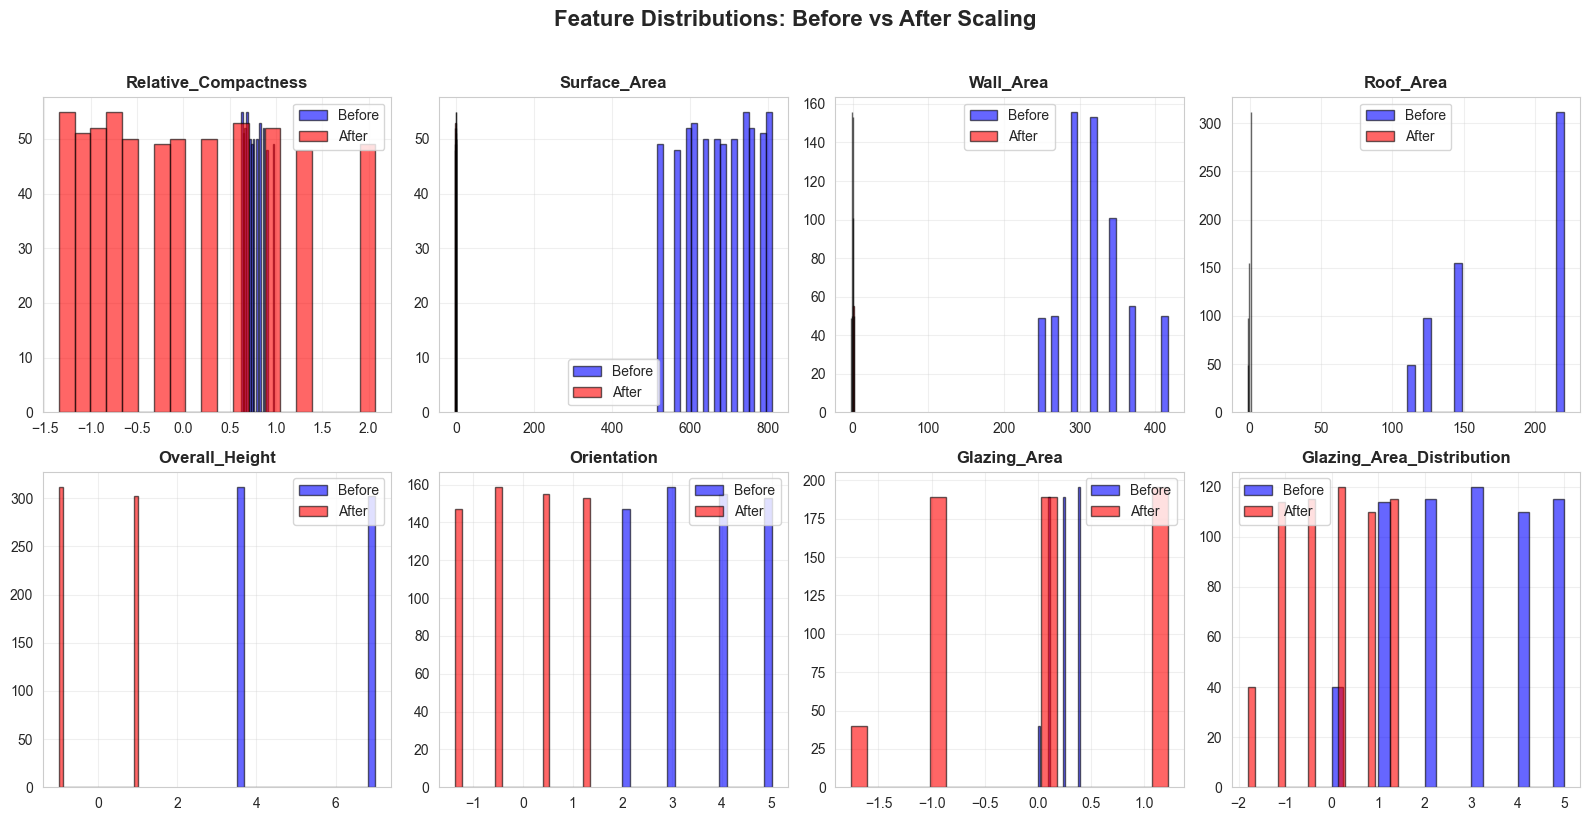

✅ Visualization complete!


In [11]:
# Compare distributions before and after scaling
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for idx, col in enumerate(feature_cols):
    # Before scaling
    axes[idx].hist(X_train_heat[col], bins=20, alpha=0.6, color='blue', label='Before', edgecolor='black')
    # After scaling
    axes[idx].hist(X_train_scaled_df[col], bins=20, alpha=0.6, color='red', label='After', edgecolor='black')
    axes[idx].set_title(col, fontweight='bold')
    axes[idx].legend()
    axes[idx].grid(alpha=0.3)

plt.suptitle('Feature Distributions: Before vs After Scaling', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("✅ Visualization complete!")

## 10. Save Preprocessed Data

Save the preprocessed datasets for use in model training notebooks

In [12]:
import pickle

# Create directory for processed data
processed_dir = Path('../datasets/processed')
processed_dir.mkdir(exist_ok=True)

# Save datasets
data_to_save = {
    'X_train_scaled': X_train_scaled_df,
    'X_test_scaled': X_test_scaled_df,
    'X_train': X_train_heat,
    'X_test': X_test_heat,
    'y_train_heating': y_train_heat,
    'y_test_heating': y_test_heat,
    'y_train_cooling': y_train_cool,
    'y_test_cooling': y_test_cool,
    'scaler': scaler,
    'feature_names': feature_cols
}

# Save as pickle file
with open(processed_dir / 'enb2012_preprocessed.pkl', 'wb') as f:
    pickle.dump(data_to_save, f)

print("=" * 70)
print("SAVE PREPROCESSED DATA")
print("=" * 70)
print(f"\n✅ Data saved to: {processed_dir / 'enb2012_preprocessed.pkl'}")
print(f"\n📦 Saved objects:")
for key in data_to_save.keys():
    if key not in ['scaler', 'feature_names']:
        print(f"   • {key}: {data_to_save[key].shape}")
    else:
        print(f"   • {key}")

print("\n" + "=" * 70)
print("PREPROCESSING COMPLETE ✅")
print("=" * 70)
print("\n📝 Summary:")
print(f"   • Original dataset: {df.shape[0]} samples, {df.shape[1]} columns")
print(f"   • Training samples: {X_train_scaled_df.shape[0]}")
print(f"   • Testing samples: {X_test_scaled_df.shape[0]}")
print(f"   • Features: {len(feature_cols)}")
print(f"   • Targets: 2 (Heating Load, Cooling Load)")
print(f"   • Scaling: StandardScaler applied")
print(f"   • Missing values: 0")
print(f"\n🎯 Ready for model training!")

SAVE PREPROCESSED DATA

✅ Data saved to: ../datasets/processed/enb2012_preprocessed.pkl

📦 Saved objects:
   • X_train_scaled: (614, 8)
   • X_test_scaled: (154, 8)
   • X_train: (614, 8)
   • X_test: (154, 8)
   • y_train_heating: (614,)
   • y_test_heating: (154,)
   • y_train_cooling: (614,)
   • y_test_cooling: (154,)
   • scaler
   • feature_names

PREPROCESSING COMPLETE ✅

📝 Summary:
   • Original dataset: 768 samples, 10 columns
   • Training samples: 614
   • Testing samples: 154
   • Features: 8
   • Targets: 2 (Heating Load, Cooling Load)
   • Scaling: StandardScaler applied
   • Missing values: 0

🎯 Ready for model training!
